In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score


In [63]:
# Utilizando o dataset 'digits' do sklearn - (8x8)
digits = load_digits()
X = digits.data
Y = digits.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

UTILIZANDO O MODELO SIMPLES (SEM NORMALIZAÇÃO DOS DADOS)

Precisão: 0.8425925925925926
Métrica F1 (ponderada): 0.8429382783269607


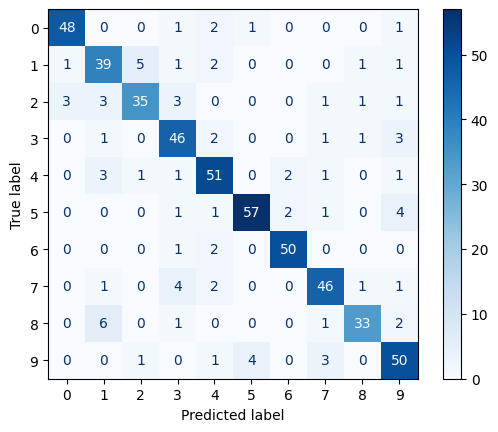

In [64]:
# Criar uma Decision Tree
clf_v1 = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf_v1.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf_v1.predict(X_test)

# Imprimir a precisão da Decision Tree

f1 = f1_score(y_test, y_pred, average='weighted')
precisão_v1 = clf_v1.score(X_test, y_test)

print(f"Precisão: {precisão_v1}")
print(f'Métrica F1 (ponderada): {f1}')

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=digits.target_names)
disp.plot(cmap="Blues")


UTILIZANDO O MODELO SIMPLES (COM NORMALIZAÇÃO DOS DADOS)

In [65]:
# Normalizando os dados
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Precisão modelo com dados normalizados:0.8444444444444444
Métrica F1 (ponderada) do Modelo 1: 0.8448762624464922


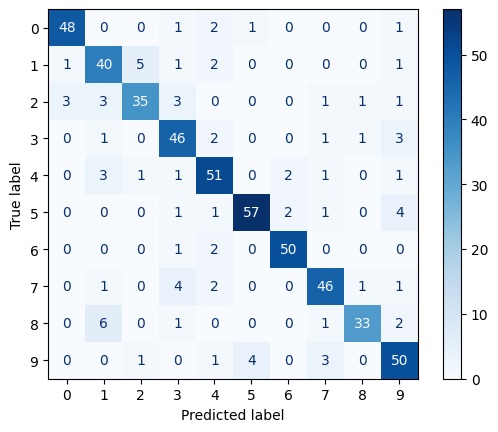

In [66]:
clf_v2 = DecisionTreeClassifier(random_state=42)
clf_v2.fit(X_train, y_train)
y_pred = clf_v2.predict(X_test)
print(f"Precisão modelo com dados normalizados:{clf_v2.score(X_test, y_test)}")


f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Métrica F1 (ponderada) do Modelo 1: {f1}')


# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=digits.target_names)
disp.plot(cmap="Blues")

UTILIZANDO O MODELO COM HYPERPARAMETROS

Precisão: 0.8833333333333333
Métrica F1 (ponderada) do Modelo 1: 0.8832958210142008


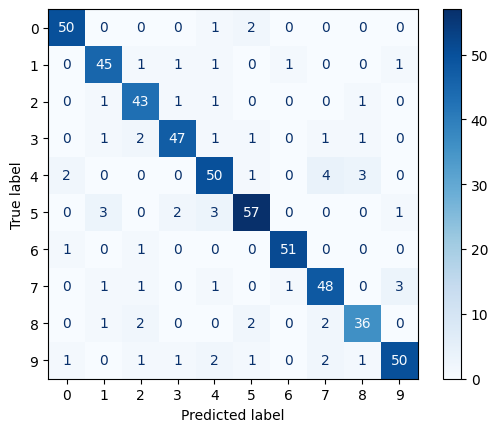

In [67]:
clf_v3 = DecisionTreeClassifier(random_state = 42, max_depth = 9, criterion = 'entropy', min_samples_leaf= 2)
clf_v3.fit(X_train, y_train)
y_pred = clf_v3.predict(X_test)

print("Precisão:", clf_v3.score(X_test, y_test))

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Métrica F1 (ponderada) do Modelo 1: {f1}')


# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=digits.target_names)
disp.plot(cmap="Blues")

Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble

In [68]:
params_clf = {
              'max_depth' : [5, 6, 7, 8, 9,10,20,50,100,200],
              'criterion' :['gini', 'entropy'],
              'min_samples_leaf' : [1,2,3,4,5,10,20,30]    
}

clf = DecisionTreeClassifier(random_state= 42)
clf_gs = GridSearchCV(clf, params_clf, cv=5, verbose= 2)
clf_gs.fit(X_train, y_train)
clf_best = clf_gs.best_estimator_
print(clf_gs.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_

In [69]:
rf = RandomForestClassifier()
params_rf = {    
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [None, 10, 20],
    'criterion' :['gini', 'entropy']}
rf_gs = GridSearchCV(rf, params_rf, cv=5, n_jobs=-1, verbose = 2)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimato

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}


In [71]:
gb = GradientBoostingClassifier()
params_gb = {
    "max_depth":[3,5,8,10], 
    "n_estimators": [100,200]
}

gb_gs = GridSearchCV(gb, params_gb, cv=5, n_jobs=-1)
gb_gs.fit(X_train, y_train)
gb_best = gb_gs.best_estimator_
print(gb_gs.best_params_)

{'max_depth': 3, 'n_estimators': 200}


In [72]:
xgb_model = XGBClassifier(max_depth=10, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))

In [73]:
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('clf: {}'.format(clf_gs.score(X_test, y_test)))
print('gb: {}'.format(gb_gs.score(X_test, y_test)))
print(f"XGBoost: {xgb_acc}")

rf: 0.9722222222222222
clf: 0.8648148148148148
gb: 0.9740740740740741
XGBoost: 0.9703703703703703


In [79]:
from sklearn.ensemble import VotingClassifier

estimators = [ ('rf', rf_best), ('clf', clf_best), ('gb', gb_best)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)

print('Precisão utilizando ensemble:' , ensemble.score(X_test, y_test))

Precisão utilizando ensemble: 0.9722222222222222


Exercício 3 - Visualização da Árvore de Decisão e Medida de Impureza

In [89]:
from sklearn import tree

fn = digits.feature_names
cn = digits.target_names

cl_c1 = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_features= 'sqrt', max_depth= 4)
cl_c1.fit(X_train, y_train)

fig, axes = plt.subplots(figsize = (12,12), dpi=800)
tree.plot_tree(cl_c1, impurity= True)

[Text(0.5, 0.9, 'x[35] <= -0.59\ngini = 0.9\nsamples = 1257\nvalue = [125.0, 132.0, 130.0, 129.0, 121.0, 116.0, 128.0, 124.0\n131.0, 121.0]'),
 Text(0.25, 0.7, 'x[34] <= -0.651\ngini = 0.833\nsamples = 421\nvalue = [118, 21, 44, 75, 30, 41, 10, 10, 2, 70]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[46] <= -0.447\ngini = 0.76\nsamples = 228\nvalue = [0, 15, 44, 73, 0, 17, 0, 9, 2, 68]'),
 Text(0.0625, 0.3, 'x[63] <= 0.089\ngini = 0.751\nsamples = 96\nvalue = [0, 10, 41, 14, 0, 11, 0, 7, 1, 12]'),
 Text(0.03125, 0.1, 'gini = 0.832\nsamples = 65\nvalue = [0, 10, 10, 14, 0, 11, 0, 7, 1, 12]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1875, 0.3, 'x[18] <= -1.09\ngini = 0.616\nsamples = 132\nvalue = [0, 5, 3, 59, 0, 6, 0, 2, 1, 56]'),
 Text(0.15625, 0.1, 'gini = 0.054\nsamples = 36\nvalue = [0, 0, 0, 35, 0, 0, 0, 0, 0, 1]'),
 Text(0.21875, 0.1, 'gini = 0.601\nsamples = 96\nvalue = [0, 5, 3, 24, 0, 6, 0, 2, 1, 55]'),
 Text(0.37

In [90]:
cl_c2 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', max_features= 'sqrt', max_depth= 4)
cl_c2.fit(X_train, y_train)

fig, axes = plt.subplots(figsize = (12,12), dpi=800)
tree.plot_tree(cl_c2, impurity= True)

[Text(0.5, 0.9, 'x[35] <= -0.59\nentropy = 3.321\nsamples = 1257\nvalue = [125.0, 132.0, 130.0, 129.0, 121.0, 116.0, 128.0, 124.0\n131.0, 121.0]'),
 Text(0.25, 0.7, 'x[34] <= -0.651\nentropy = 2.836\nsamples = 421\nvalue = [118, 21, 44, 75, 30, 41, 10, 10, 2, 70]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[46] <= 0.242\nentropy = 2.286\nsamples = 228\nvalue = [0, 15, 44, 73, 0, 17, 0, 9, 2, 68]'),
 Text(0.0625, 0.3, 'x[27] <= -0.489\nentropy = 2.416\nsamples = 120\nvalue = [0, 14, 44, 19, 0, 11, 0, 9, 1, 22]'),
 Text(0.03125, 0.1, 'entropy = 1.783\nsamples = 75\nvalue = [0, 7, 44, 12, 0, 1, 0, 9, 0, 2]'),
 Text(0.09375, 0.1, 'entropy = 1.959\nsamples = 45\nvalue = [0, 7, 0, 7, 0, 10, 0, 0, 1, 20]'),
 Text(0.1875, 0.3, 'x[18] <= -0.914\nentropy = 1.381\nsamples = 108\nvalue = [0, 1, 0, 54, 0, 6, 0, 0, 1, 46]'),
 Text(0.15625, 0.1, 'entropy = 0.201\nsamples = 32\nvalue = [0, 0, 0, 31, 0, 0, 0, 0, 0, 1]'),
 Text(0.21875, 0.1, 'entropy = 1.423\nsamples = 76\nvalue = [0, 1, 0, 23, 

Esses valores de impureza refletem o grau de mistura das classes em cada nó. 

Um valor de 0 indica que o nó é puro, ou seja, todos os exemplos nesse nó pertencem à mesma classe, enquanto valores mais altos indicam maior incerteza (ou mistura) entre as classes.

Impacto no desempenho do modelo:
Nós puros (impureza 0) são ideais porque a árvore conseguiu separar completamente as classes nesse ponto.

Nós com impureza mais alta indicam uma maior mistura de classes, o que poderia sugerir que o nó ainda pode ser dividido para melhorar a pureza.

Neste exemplo é utilizado o modelo de "DecisionTreeClassifier" utilizando medida de impureza "Gini" e "Entropy"

In [92]:
impurezas_c1 = cl_c1.tree_.impurity
impurezas_c2 = cl_c2.tree_.impurity

for i, imp in enumerate(impurezas_c1):
    print(f"Nó {i}: Impureza = {imp}")

Nó 0: Impureza = 0.8998455111202247
Nó 1: Impureza = 0.8329336891577005
Nó 2: Impureza = 0.7597722376115728
Nó 3: Impureza = 0.7513020833333334
Nó 4: Impureza = 0.831715976331361
Nó 5: Impureza = 0.0
Nó 6: Impureza = 0.6159320477502296
Nó 7: Impureza = 0.054012345679012363
Nó 8: Impureza = 0.6011284722222222
Nó 9: Impureza = 0.5826733603586673
Nó 10: Impureza = 0.5914202415660141
Nó 11: Impureza = 0.6869806094182825
Nó 12: Impureza = 0.18666666666666665
Nó 13: Impureza = 0.3461612654320988
Nó 14: Impureza = 0.03374972605741833
Nó 15: Impureza = 0.5459533607681756
Nó 16: Impureza = 0.8815989789611044
Nó 17: Impureza = 0.8367011834319527
Nó 18: Impureza = 0.7991373394765219
Nó 19: Impureza = 0.7746617522492617
Nó 20: Impureza = 0.39542779538252604
Nó 21: Impureza = 0.6642315615111809
Nó 22: Impureza = 0.5706371191135734
Nó 23: Impureza = 0.49140625000000004
Nó 24: Impureza = 0.82653020349303
Nó 25: Impureza = 0.7720255440510881
Nó 26: Impureza = 0.5506198347107438
Nó 27: Impureza = 0.672

In [93]:
for i, imp in enumerate(impurezas_c2):
    print(f"Nó {i}: Impureza = {imp}")

Nó 0: Impureza = 3.3208058114881256
Nó 1: Impureza = 2.836152285651253
Nó 2: Impureza = 2.2862268147275935
Nó 3: Impureza = 2.4158976680061244
Nó 4: Impureza = 1.7832806812148279
Nó 5: Impureza = 1.9593906128757341
Nó 6: Impureza = 1.3812064827210906
Nó 7: Impureza = 0.20062232431271465
Nó 8: Impureza = 1.4231237064899855
Nó 9: Impureza = 1.7783287799444478
Nó 10: Impureza = 1.659257888436696
Nó 11: Impureza = 1.81294527625988
Nó 12: Impureza = 0.6274918436613969
Nó 13: Impureza = 1.0988972294687995
Nó 14: Impureza = 0.14189159258679648
Nó 15: Impureza = 1.5327896019567016
Nó 16: Impureza = 3.1505787451007765
Nó 17: Impureza = 2.818633883645351
Nó 18: Impureza = 2.6007266198440684
Nó 19: Impureza = 2.5002366502173032
Nó 20: Impureza = 1.2497710231089454
Nó 21: Impureza = 2.0112847352347036
Nó 22: Impureza = 1.5596684853176566
Nó 23: Impureza = 1.5289017895218318
Nó 24: Impureza = 2.684712857209022
Nó 25: Impureza = 2.402107837360291
Nó 26: Impureza = 1.43589885967262
Nó 27: Impureza = 

EXPORTANDO O MODELO

In [94]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "ensemble_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(ensemble, file)

: 